In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from lang_main import io
from lang_main.analysis.graphs import rescale_edge_weights, get_graph_metadata

from pathlib import Path
import pickle
import base64
import os
from logging import NullHandler

import numpy as np
import networkx as nx

import py4cytoscape as p4c
#import py4cytoscape.py4cytoscape_logger_settings as p4c_logging
#p4c.set_summary_logger(False)
#p4c_logging._SUMMARY_LOG_LEVEL = 'ERROR'
# p4c_logging._DETAIL_LOG_LEVEL = 'ERROR'
#p4c.py4cytoscape_logger.detail_logger.setLevel('ERROR')
#p4c.py4cytoscape_logger.detail_logger.removeHandler(p4c.py4cytoscape_logger.detail_handler)
#p4c.py4cytoscape_logger.detail_logger.addHandler(NullHandler())

2024-07-17 16:02:39 +0000 | io:INFO | Loaded TOML config file successfully.


A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytre

In [6]:
res_path = Path(r'A:\Arbeitsaufgaben\lang-main\scripts\results\test_20240619')
assert res_path.exists()

In [7]:
#obj = 'TK-GRAPH_POSTPROCESSING.pkl'
obj = 'TK-GRAPH_ANALYSIS.pkl'
load_pth = res_path / obj
assert load_pth.exists()

In [8]:
ret = io.load_pickle(load_pth)

2024-07-17 16:02:46 +0000 | io:INFO | Loaded file successfully.


In [6]:
tkg = ret[0]

In [7]:
tkg

TokenGraph(name: TokenGraph, number of nodes: 158, number of edges: 192)

In [8]:
tkg.rescaled_weights

False

In [9]:
tkg.nodes['Wartungstätigkeit']

{}

In [10]:
obj = 'TK-GRAPH_POSTPROCESSING.pkl'
# obj = 'TK-GRAPH_ANALYSIS.pkl'
load_pth = res_path / obj
assert load_pth.exists()

In [11]:
ret = io.load_pickle(load_pth)

2024-07-17 06:04:17 +0000 | io:INFO | Loaded file successfully.


In [12]:
tkg = ret[0]

In [13]:
tkg

TokenGraph(name: TokenGraph, number of nodes: 6859, number of edges: 25499)

In [25]:
tkg.rescaled_weights = False

In [26]:
directed, undirected = tkg.rescale_edge_weights()

In [28]:
directed.metadata_directed

{'num_nodes': 6028,
 'num_edges': 17950,
 'min_edge_weight': 0.0952,
 'max_edge_weight': 1.0,
 'node_memory': 382321,
 'edge_memory': 1005200,
 'total_memory': 1387521}

In [29]:
directed.metadata_undirected

{'num_nodes': 6028,
 'num_edges': 17554,
 'min_edge_weight': 0.09520000219345093,
 'max_edge_weight': 1.7527999877929688,
 'node_memory': 382321,
 'edge_memory': 983024,
 'total_memory': 1365345}

In [30]:
get_graph_metadata(undirected)

{'num_nodes': 6028,
 'num_edges': 17554,
 'min_edge_weight': 0.0952,
 'max_edge_weight': 1.0,
 'node_memory': 382321,
 'edge_memory': 983024,
 'total_memory': 1365345}

In [12]:
Gtest = rescale_edge_weights(tkg)

break_early = False
i = 0
for idx, (node1, node2) in enumerate(list(Gtest.edges)):
    if break_early and i == 10:
        break
    Gtest[node1][node2]['weight'] = adjusted_weights[idx]
    
    i += 1

In [13]:
break_early = True
i = 0
for n1, n2, w in Gtest.edges.data('weight'):
    if break_early and i == 10:
        break
    print(n1, n2, w)

    i += 1

Wartungstätigkeit Vorgabe 1.0
Wartungstätigkeit Maschinenhersteller 1.0
Wartungstätigkeit Maschinenbediener 0.8215
Wartungstätigkeit Laserabteilung 0.8215
Wartungstätigkeit Arbeitsplan 0.8219
Wartungstätigkeit abarbeiten 0.8215
Wartungstätigkeit Webmaschinenkontrollliste 0.2534
Wartungstätigkeit sehen 0.2534
Vorgabe Maschinenhersteller 1.0
Vorgabe Wartungsplan 0.9181


In [14]:
Gtest.to_undirected(inplace=True)

AttributeError: 'TokenGraph' object has no attribute 'rescaled_weights'

In [15]:
break_early = True
i = 0
for n1, n2, w in Gtest.undirected.edges.data('weight'):
    if break_early and i == 10:
        break
    print(n1, n2, w)

    i += 1

Wartungstätigkeit Vorgabe 1.0
Wartungstätigkeit Maschinenhersteller 1.0
Wartungstätigkeit sehen 0.2533999979496002
Wartungstätigkeit Maschinenbediener 0.8215000033378601
Wartungstätigkeit Laserabteilung 0.8215000033378601
Wartungstätigkeit Arbeitsplan 0.8219000101089478
Wartungstätigkeit abarbeiten 0.8215000033378601
Wartungstätigkeit Webmaschinenkontrollliste 0.2533999979496002
Vorgabe Maschinenhersteller 1.0
Vorgabe Wartungsplan 0.9180999994277954


In [16]:
Gtest.metadata_undirected

{'num_nodes': 6028,
 'num_edges': 17554,
 'min_edge_weight': 0.09520000219345093,
 'max_edge_weight': 1.7527999877929688,
 'node_memory': 382321,
 'edge_memory': 983024,
 'total_memory': 1365345}

In [23]:
'weight' not in Gtest['Wartungstätigkeit']['Vorgabe']

False

In [17]:
Gtest.metadata_directed

{'num_nodes': 6028,
 'num_edges': 17950,
 'min_edge_weight': 0.0952,
 'max_edge_weight': 1.0,
 'node_memory': 382321,
 'edge_memory': 1005200,
 'total_memory': 1387521}

In [21]:
c_comps = nx.connected_components(Gtest.undirected)

In [22]:
for comp in c_comps:
    print(len(comp))

5714
2
2
2
3
4
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
2
2
2
2
3
3
4
2
2
2
2
2
2
2
2
3
2
2
2
2
3
2
3
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
4
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
3
2
2
3
2
2
2
2
2
2
3
2
2
2
4
2
2
2
3
2
2
2
2
2
2
2
3
2
2
4
2
3
2
2
2
3
3
2
2
2
2
2
2
2
2
3
2
2
2


---

# Load re-scaled Token Graph

In [93]:
#obj = 'TK-GRAPH_POSTPROCESSING.pkl'
obj = 'TK-GRAPH_ANALYSIS_RESCALED.pkl'
load_pth = res_path / obj
assert load_pth.exists()

In [94]:
ret = io.load_pickle(load_pth)

2024-07-17 07:15:34 +0000 | io:INFO | Loaded file successfully.


In [95]:
tk_resc = ret[1]

In [96]:
get_graph_metadata(tk_resc)

{'num_nodes': 158,
 'num_edges': 189,
 'min_edge_weight': 0.0952,
 'max_edge_weight': 1.0,
 'node_memory': 9908,
 'edge_memory': 10584,
 'total_memory': 20492}

In [97]:
break_early = True
n = 10

for idx, (node, weighted_degree) in enumerate(tk_resc.degree(weight='weight')):
    if break_early and idx == n:
        break
    print(node, weighted_degree)

Wartungstätigkeit 3.1190000474452972
Vorgabe 4.145399987697601
Maschinenhersteller 2.0
Sichtkontrolle 0.8227999806404114
Reinigung 1.7093999981880188
Überprüfung 2.0071999728679657
Ölabscheider 0.7318999767303467
Kontrolle 6.2471999898552895
C-Anlage 0.6929000020027161
Stabbreithalter 0.5758000016212463


In [312]:
dict(tk_resc.degree(weight='weight'))

{'Wartungstätigkeit': 3.1190000474452972,
 'Vorgabe': 4.145399987697601,
 'Maschinenhersteller': 2.0,
 'Sichtkontrolle': 0.8227999806404114,
 'Reinigung': 1.7093999981880188,
 'Überprüfung': 2.0071999728679657,
 'Ölabscheider': 0.7318999767303467,
 'Kontrolle': 6.2471999898552895,
 'C-Anlage': 0.6929000020027161,
 'Stabbreithalter': 0.5758000016212463,
 'Scharniere': 0.7002999782562256,
 '--': 0.7002999782562256,
 'Schließvorrichtung': 0.7059999704360962,
 'Schloß': 0.7059999704360962,
 'Kompressorstation': 0.5514000058174133,
 'Wasseraufbereitungsanlage': 0.5105999708175659,
 'Heizungsanlage': 0.5101000070571899,
 'Druckkontrolle': 1.140199989080429,
 'bar': 1.2935999631881714,
 'machen': 1.4854000210762024,
 'gegebenenfalls': 0.4934000074863434,
 'Filter': 0.4934000074863434,
 'sauber': 0.4986000061035156,
 'Leiter': 0.6482000052928925,
 'Analyse': 0.42980000376701355,
 'Kesselwasser': 0.42980000376701355,
 'überprüfen': 0.42980000376701355,
 'Wasserverbrauch': 0.42980000376701355,
 

In [98]:
nx.set_node_attributes(tk_resc, dict(tk_resc.degree(weight='weight')), name='weight_degree')

In [102]:
break_early = True
n = 10

for idx, node in enumerate(tk_resc.nodes):
    if break_early and idx == n:
        break
    print(tk_resc.nodes[node])

{'weight_degree': 3.1190000474452972}
{'weight_degree': 4.145399987697601}
{'weight_degree': 2.0}
{'weight_degree': 0.8227999806404114}
{'weight_degree': 1.7093999981880188}
{'weight_degree': 2.0071999728679657}
{'weight_degree': 0.7318999767303467}
{'weight_degree': 6.2471999898552895}
{'weight_degree': 0.6929000020027161}
{'weight_degree': 0.5758000016212463}


In [103]:
#import py4cytoscape as p4c
p4c.cytoscape_ping()

You are connected to Cytoscape!


'You are connected to Cytoscape!'

In [164]:
p4c.get_collection_list()

['lang_main']

In [25]:
p4c.networks.delete_all_networks()

''

In [182]:
p4c.networks.delete_network('test3')

''

In [208]:
p4c.networks.delete_all_networks()

''

In [209]:

p4c.create_network_from_networkx(tk_resc, title=BASE_NAME, collection='lang_main')

Applying default style...
Applying preferred layout


20743

In [210]:
p4c.tools.analyze_network(directed=False)

{'networkTitle': 'test (undirected)',
 'nodeCount': '158',
 'edgeCount': '189',
 'avNeighbors': '2.3684210526315788',
 'diameter': '10',
 'radius': '5',
 'avSpl': '3.7965860597439547',
 'cc': '0.3375',
 'density': '0.06401137980085347',
 'heterogeneity': '1.0891156226526975',
 'centralization': '0.38888888888888895',
 'ncc': '27',
 'time': '0.003'}

---

In [282]:
BASE_NETWORK_NAME = 'test'

def import_to_cytoscape(graph):
    p4c.networks.delete_all_networks()
    p4c.create_network_from_networkx(graph, title=BASE_NETWORK_NAME, collection='lang_main')
    p4c.tools.analyze_network(directed=False)


def reset_current_network_to_base():
    p4c.set_current_network(BASE_NETWORK_NAME)


def export_network_to_image(filename, filetype='SVG', network_name=BASE_NETWORK_NAME):
    target_folder = Path.cwd() / 'results'
    if not target_folder.exists():
        target_folder.mkdir(parents=True)
    file_pth = target_folder / filename

    text_as_font = True
    if filetype == 'SVG':
        text_as_font = False

    p4c.export_image(filename=str(file_pth), type=filetype, network=network_name, overwrite_file=True, all_graphics_details=True, export_text_as_font=text_as_font, page_size='A4')

In [283]:
LAYOUT_NAME = 'force-directed'
LAYOUT_PROPERTIES = {
    'numIterations': 1000,
    'defaultSpringCoefficient': 1e-4,
    'defaultSpringLength': 45,
    'defaultNodeMass': 11,
    'isDeterministic': True,
    'singlePartition': False,
}
PATH_STYLESHEET = Path('lang_main.xml')
STYLESHEET_NAME = 'lang_main'

def layout_network(layout_name=LAYOUT_NAME, layout_properties=LAYOUT_PROPERTIES, network_name=BASE_NETWORK_NAME):
    p4c.set_layout_properties(layout_name, layout_properties)
    p4c.layout_network(layout_name=layout_name, network=network_name)
    p4c.fit_content(selected_only=False, network=network_name)


def apply_style_to_network(pth_to_stylesheet=PATH_STYLESHEET, network_name=BASE_NETWORK_NAME):
    styles_avail = p4c.get_visual_style_names()
    if STYLESHEET_NAME not in styles_avail:
        p4c.import_visual_styles(pth_to_stylesheet)

    p4c.set_visual_style(STYLESHEET_NAME, network=network_name)
    p4c.fit_content(selected_only=False, network=network_name)

In [304]:
SELECTION_PROPERTY = 'node_selection'
SELECTION_NUMBER = 5
ITER_NEIGHBOUR_DEPTH = 2

def get_sub_node_selection(network_name=BASE_NETWORK_NAME):
    node_table = p4c.get_table_columns(network=network_name)
    node_table['stress_norm'] = node_table['Stress'] / node_table['Stress'].max()
    node_table[SELECTION_PROPERTY] = node_table['weight_degree'] * node_table['BetweennessCentrality'] * node_table['stress_norm']
    node_table = node_table.sort_values(by=SELECTION_PROPERTY, ascending=False)
    node_table_choice = node_table.iloc[:SELECTION_NUMBER,:]

    return node_table_choice['SUID'].to_list()


def select_neighbours_of_node(node, network_name=BASE_NETWORK_NAME):
    p4c.clear_selection(network=network_name)
    p4c.select_nodes(node, network=network_name)

    for _ in range(ITER_NEIGHBOUR_DEPTH):
        _ = p4c.select_first_neighbors(network=network_name)

    _ = p4c.select_edges_connecting_selected_nodes()


def make_subnetwork(index, network_name=BASE_NETWORK_NAME, export_image=True):
    subnetwork_name = network_name + f'_sub_{index+1}'
    p4c.create_subnetwork(nodes='selected', edges='selected', subnetwork_name=subnetwork_name, network=network_name)
    p4c.set_current_network(subnetwork_name)
    p4c.fit_content(selected_only=False, network=network_name)
    if export_image:
        export_network_to_image(filename=subnetwork_name, network_name=subnetwork_name)


def build_subnetworks(nodes_to_analyse, network_name=BASE_NETWORK_NAME, export_image=True):
    for idx, node in enumerate(nodes_to_analyse):
        select_neighbours_of_node(node=node, network_name=network_name)
        make_subnetwork(index=idx, network_name=network_name, export_image=export_image)

---

1. import network
2. layouting
3. apply styles
4. export image
5. build subgraphs
    1. get candidates
    2. build subnetwork
    3. export subnetwork

In [305]:
import_to_cytoscape(tk_resc)

Applying default style...
Applying preferred layout


In [306]:
layout_network()

In [307]:
apply_style_to_network()

In [308]:
export_network_to_image(filename=BASE_NETWORK_NAME)

In [309]:
nodes_to_analyse = get_sub_node_selection()

In [310]:
build_subnetworks(nodes_to_analyse=nodes_to_analyse, export_image=True)

No nodes selected.
No nodes selected.
No nodes selected.
No nodes selected.


In [9]:
test = dict()

In [11]:
if not test:
    print('jo')

jo


In [12]:
from lang_main.render.cytoscape import layout_network

In [13]:
layout_network()

In [296]:
IDX = 0
nodes_to_select[IDX]

41497

In [297]:
select_neighbours_of_node(nodes_to_select[IDX])

In [300]:
build_subnetwork(IDX)

In [190]:
node_table = p4c.get_table_columns(network=BASE_NAME)

In [191]:
type(node_table)

pandas.core.frame.DataFrame

In [192]:
node_table.sort_values(by='Degree', ascending=False)

SUID           shared name                  name  selected  \
18610  18610             Kontrolle             Kontrolle     False   
18778  18778                  Herr                  Herr     False   
18799  18799                 Firma                 Firma     False   
18694  18694                 sehen                 sehen     False   
18712  18712             schmieren             schmieren     False   
...      ...                   ...                   ...       ...   
19048  19048                   E50                   E50     False   
19045  19045                    Öl                    Öl     False   
19042  19042  Rollenkette-zweifach  Rollenkette-zweifach     False   
19039  19039      Wechselintervall      Wechselintervall     False   
18943  18943                Menzel                Menzel     False   

                         id  weight_degree  AverageShortestPathLength  \
18610             Kontrolle         6.2472                   2.270270   
18778                  Herr         5.4802                   3.114286   
18799                 Firma         3.6372                   3.571429   
18694                 sehen         3.6508                   3.114286   
18712             schmieren         1.4378                   2.621622   
...                     ...            ...                        ...   
19048                   E50         0.1762                   4.243243   
19045                    Öl         0.1762                   1.000000   
19042  Rollenkette-zweifach         0.1762                   1.000000   
19039      Wechselintervall         0.1762                   1.000000   
18943                Menzel         0.5950                   4.542857   

       ClusteringCoefficient  ClosenessCentrality  IsSingleNode  ...  \
18610               0.025000             0.440476         False  ...   
18778               0.294872             0.321101         False  ...   
18799               0.127273             0.280000         False  ...   
18694               0.333333             0.321101         False  ...   
18712               0.066667             0.381443         False  ...   
...                      ...                  ...           ...  ...   
19048               0.000000             0.235669         False  ...   
19045               0.000000             1.000000         False  ...   
19042               0.000000             1.000000         False  ...   
19039               0.000000             1.000000         False  ...   
18943               0.000000             0.220126         False  ...   

       SelfLoops  Eccentricity  Stress  Degree  BetweennessCentrality  \
18610          0             5    1062      16               0.797297   
18778          1             6     962      15               0.402857   
18799          0             7    1328      11               0.401681   
18694          0             6    1034       7               0.281793   
18712          0             6     626       6               0.469970   
...          ...           ...     ...     ...                    ...   
19048          0             8       0       1               0.000000   
19045          0             1       0       1               0.000000   
19042          0             1       0       1               0.000000   
19039          0             1       0       1               0.000000   
18943          0             8       0       1               0.000000   

       NeighborhoodConnectivity  NumberOfDirectedEdges  \
18610                  1.812500                      0   
18778                  4.692308                      0   
18799                  2.818182                      0   
18694                  4.571429                      0   
18712                  4.333333                      0   
...                         ...                    ...   
19048                  4.000000                      0   
19045                  1.000000                      0   
19042                  1.0

---

In [193]:
node_table['stress_norm'] = node_table['Stress'] / node_table['Stress'].max()

In [194]:
node_table['w_deg with betweenness'] = node_table['weight_degree'] * node_table['BetweennessCentrality'] * node_table['stress_norm']

In [195]:
node_table_sorted = node_table.sort_values(by='w_deg with betweenness', ascending=False)

In [196]:
node_table_sorted.head()

SUID        shared name               name  selected  \
18610  18610          Kontrolle          Kontrolle     False   
18585  18585  Wartungstätigkeit  Wartungstätigkeit     False   
18778  18778               Herr               Herr     False   
18799  18799              Firma              Firma     False   
18592  18592            Vorgabe            Vorgabe     False   

                      id  weight_degree  AverageShortestPathLength  \
18610          Kontrolle         6.2472                   2.270270   
18585  Wartungstätigkeit         3.1190                   2.714286   
18778               Herr         5.4802                   3.114286   
18799              Firma         3.6372                   3.571429   
18592            Vorgabe         4.1454                   2.885714   

       ClusteringCoefficient  ClosenessCentrality  IsSingleNode  ...  Stress  \
18610               0.025000             0.440476         False  ...    1062   
18585               0.133333             0.368421         False  ...    1758   
18778               0.294872             0.321101         False  ...     962   
18799               0.127273             0.280000         False  ...    1328   
18592               0.400000             0.346535         False  ...    1106   

       Degree  BetweennessCentrality  NeighborhoodConnectivity  \
18610      16               0.797297                  1.812500   
18585       6               0.571429                  3.000000   
18778      15               0.402857                  4.692308   
18799      11               0.401681                  2.818182   
18592       5               0.315406                  4.600000   

       NumberOfDirectedEdges  NumberOfUndirectedEdges  Radiality  \
18610                      0                       16   0.920608   
18585                      0                        6   0.868132   
18778                      0                       14   0.837363   
18799                      0                       11   0.802198   
18592                      0                        5   0.854945   

       TopologicalCoefficient  stress_norm  w_deg with betweenness  
18610                0.091346     0.604096                3.008925  
18585                0.242424     1.000000                1.782286  
18778                0.329670     0.547213                1.208102  
18799                0.223140     0.755404                1.103640  
18592                0.383333     0.629124                0.822570  

[5 rows x 23 columns]

In [197]:
node_table_choice = node_table_sorted.iloc[:5,:]

In [198]:
node_table_choice

SUID        shared name               name  selected  \
18610  18610          Kontrolle          Kontrolle     False   
18585  18585  Wartungstätigkeit  Wartungstätigkeit     False   
18778  18778               Herr               Herr     False   
18799  18799              Firma              Firma     False   
18592  18592            Vorgabe            Vorgabe     False   

                      id  weight_degree  AverageShortestPathLength  \
18610          Kontrolle         6.2472                   2.270270   
18585  Wartungstätigkeit         3.1190                   2.714286   
18778               Herr         5.4802                   3.114286   
18799              Firma         3.6372                   3.571429   
18592            Vorgabe         4.1454                   2.885714   

       ClusteringCoefficient  ClosenessCentrality  IsSingleNode  ...  Stress  \
18610               0.025000             0.440476         False  ...    1062   
18585               0.133333             0.368421         False  ...    1758   
18778               0.294872             0.321101         False  ...     962   
18799               0.127273             0.280000         False  ...    1328   
18592               0.400000             0.346535         False  ...    1106   

       Degree  BetweennessCentrality  NeighborhoodConnectivity  \
18610      16               0.797297                  1.812500   
18585       6               0.571429                  3.000000   
18778      15               0.402857                  4.692308   
18799      11               0.401681                  2.818182   
18592       5               0.315406                  4.600000   

       NumberOfDirectedEdges  NumberOfUndirectedEdges  Radiality  \
18610                      0                       16   0.920608   
18585                      0                        6   0.868132   
18778                      0                       14   0.837363   
18799                      0                       11   0.802198   
18592                      0                        5   0.854945   

       TopologicalCoefficient  stress_norm  w_deg with betweenness  
18610                0.091346     0.604096                3.008925  
18585                0.242424     1.000000                1.782286  
18778                0.329670     0.547213                1.208102  
18799                0.223140     0.755404                1.103640  
18592                0.383333     0.629124                0.822570  

[5 rows x 23 columns]

In [199]:
nodes_to_select = node_table_choice['SUID'].to_list()

In [200]:
p4c.clear_selection()

''

In [239]:
p4c.select_nodes(nodes_to_select[0])

{}

In [202]:
iter_depth = 2

for _ in range(iter_depth):
    _ = p4c.select_first_neighbors()

In [203]:
_ = p4c.select_edges_connecting_selected_nodes()

In [206]:
p4c.create_subnetwork(nodes='selected', edges='selected', subnetwork_name='test_sub_1')

20402

In [205]:
p4c.fit_content(selected_only=False)

{}

In [314]:
sorted(list(p4c.get_layout_name_mapping().values()))

['attribute-circle',
 'attribute-grid',
 'attributes-layout',
 'circular',
 'cose',
 'degree-circle',
 'force-directed',
 'force-directed-cl',
 'fruchterman-rheingold',
 'grid',
 'hierarchical',
 'isom',
 'kamada-kawai',
 'stacked-node-layout']

In [186]:
p4c.get_layout_property_names('force-directed')

['numIterations',
 'defaultSpringCoefficient',
 'defaultSpringLength',
 'defaultNodeMass',
 'isDeterministic',
 'singlePartition']

In [259]:
LAYOUT_NAME = 'force-directed'
LAYOUT_PROPERTIES = {
    'numIterations': 1000,
    'defaultSpringCoefficient': 1e-4,
    'defaultSpringLength': 45,
    'defaultNodeMass': 11,
    'isDeterministic': True,
    'singlePartition': False,
}

In [188]:
p4c.set_layout_properties('force-directed', layout_props)
#p4c.get_layout_property_type('kamada-kawai', 'randomize')

''

In [189]:
p4c.layout_network(layout_name='force-directed', network='test3')

{}

In [ ]:
p4c.fit_content(selected_only=False)

In [34]:
# visual style gets always imported with increasing index,
# later check if style in Cytoscape is already available
styles_avail = p4c.get_visual_style_names()

In [35]:
if 'lang_main' not in styles_avail:
    p4c.import_visual_styles('lang_main.xml')

In [36]:
assert 'lang_main' in p4c.get_visual_style_names()

In [37]:
p4c.set_visual_style('lang_main')

{'message': 'Visual Style applied.'}

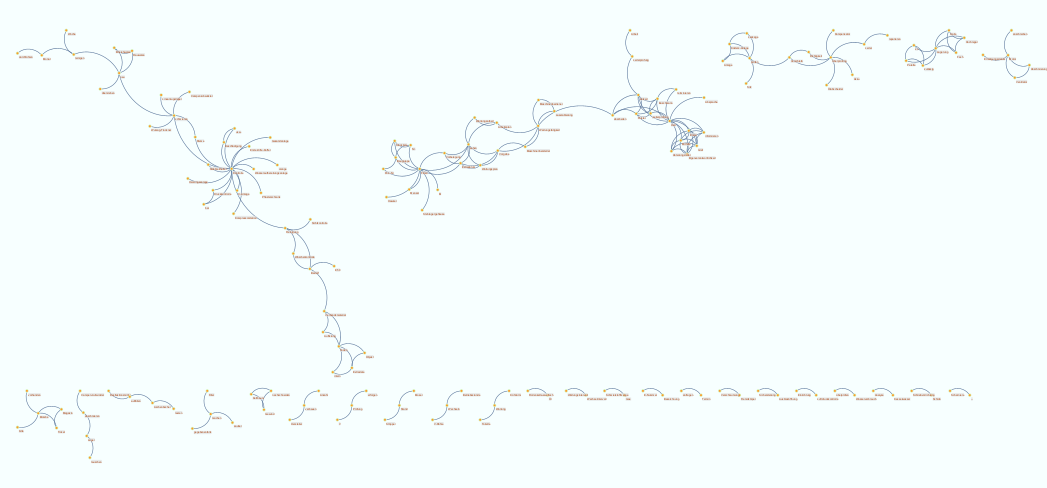

In [79]:
p4c.notebook_export_show_image()

- graph properties in Cytoscape or pre-calculated?
- node sizes depending on graph properties
- edge width depending on graph properties

---

# Py4Cytoscape

In [11]:
import py4cytoscape as p4c
dir(p4c)
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | Calling cytoscape_ping()
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀCalling cytoscape_version_info(base_url='http://127.0.0.1:1234/v1')
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀǀCalling cyrest_get('version', base_url='http://127.0.0.1:1234/v1')
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀǀHTTP GET(http://127.0.0.1:1234/v1/version)
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀǀOK[200], content: {"apiVersion":"v1","cytoscapeVersion":"3.10.2"}
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀǀReturning 'cyrest_get': {'apiVersion': 'v1', 'cytoscapeVersion': '3.10.2'}
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | ǀReturning 'cytoscape_version_info': {'apiVersion': 'v1', 'cytoscapeVersion': '3.10.2', 'automationAPIVersion': '1.9.0', 'py4cytoscapeVersion': '1.9.0'}
You are connected to Cytoscape!
2024-07-10 11:19:15 +0000 | py4cytoscape_logger:DEBUG | Returning 'cyt

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.2',
 'automationAPIVersion': '1.9.0',
 'py4cytoscapeVersion': '1.9.0'}

In [5]:
import pandas as pd
nodes = pd.DataFrame(data={'id': ["node 0","node 1","node 2","node 3"], 'group': ["A","A","B","B"], 'score': [20,10,15,5]})
edges = pd.DataFrame(data={'source': ["node 0","node 0","node 0","node 2"], 'target': ["node 1","node 2","node 3","node 3"], 'interaction': ["inhibits","interacts","activates","interacts"], 'weight': [5.1,3.0,5.2,9.9]})

In [6]:
nodes

id group  score
0  node 0     A     20
1  node 1     A     10
2  node 2     B     15
3  node 3     B      5

In [7]:
edges

source  target interaction  weight
0  node 0  node 1    inhibits     5.1
1  node 0  node 2   interacts     3.0
2  node 0  node 3   activates     5.2
3  node 2  node 3   interacts     9.9

In [8]:
p4c.create_network_from_data_frames(nodes, edges, title="my first network", collection="DataFrame Example")

Applying default style...
Applying preferred layout


128

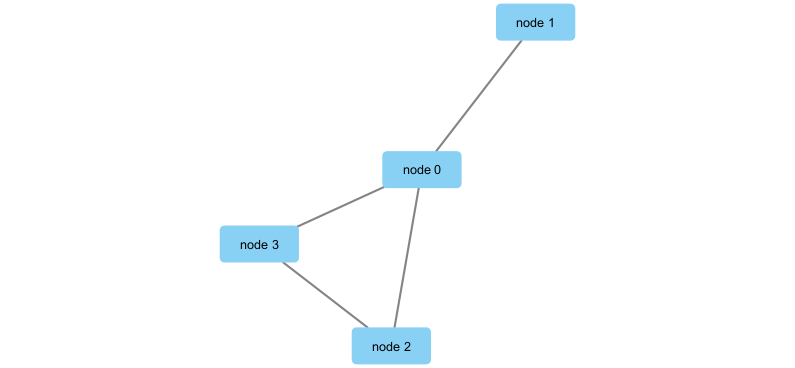

In [10]:
p4c.notebook_export_show_image()

In [11]:
p4c.set_visual_style('Marquee')

{'message': 'Visual Style applied.'}

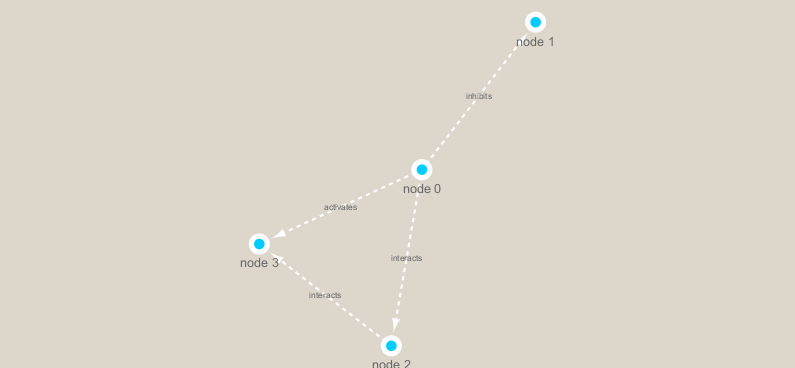

In [13]:
p4c.notebook_export_show_image()

In [14]:
style_name = "myStyle"
defaults = {'NODE_SHAPE': "diamond", 'NODE_SIZE': 30, 'EDGE_TRANSPARENCY': 120, 'NODE_LABEL_POSITION': "W,E,c,0.00,0.00"}
nodeLabels = p4c.map_visual_property('node label', 'id', 'p') #'p' means 'passthrough' mapping
edgeWidth = p4c.map_visual_property('edge width', 'weight', 'p') #'p' means 'passthrough' mapping
p4c.create_visual_style(style_name, defaults, [nodeLabels, edgeWidth])
p4c.set_visual_style(style_name)

{'message': 'Visual Style applied.'}

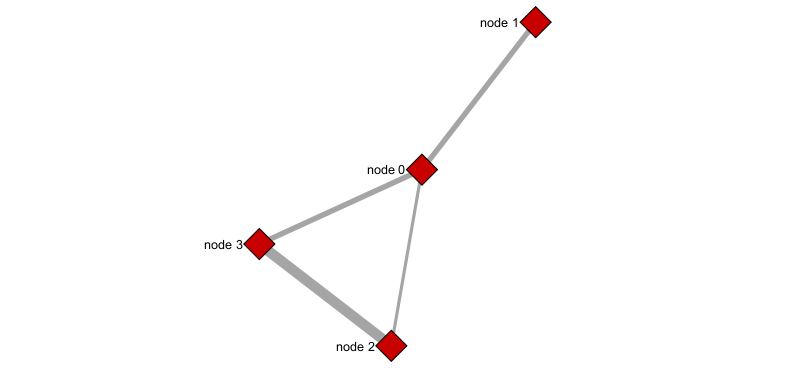

In [15]:
p4c.notebook_export_show_image()

In [20]:
nodes = pd.DataFrame(data={'id': ["A", "B", "C", "D"]})
edges = pd.DataFrame(data={'source': ["C", "B", "B", "B"], 'target': ["D", "A", "D", "C"]})

p4c.create_network_from_data_frames(nodes, edges, title="simple network", collection="Biological Example")

Applying default style...
Applying preferred layout


397

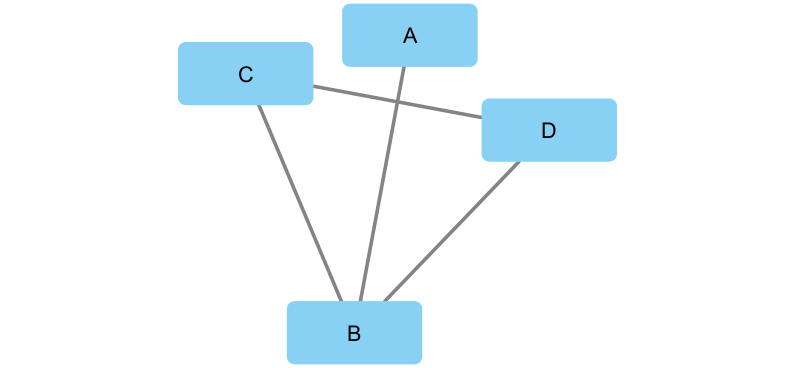

In [21]:
p4c.notebook_export_show_image()

In [22]:
p4c.get_table_columns()

SUID shared name id name  selected
427   427           A  A    A     False
430   430           B  B    B     False
433   433           C  C    C     False
436   436           D  D    D     False

In [23]:
p4c.get_table_column_names()

['SUID', 'shared name', 'id', 'name', 'selected']

In [25]:
p4c.get_layout_name_mapping()

{'Attribute Circle Layout': 'attribute-circle',
 'Stacked Node Layout': 'stacked-node-layout',
 'Attribute Grid Layout': 'attribute-grid',
 'Degree Sorted Circle Layout': 'degree-circle',
 'Circular Layout': 'circular',
 'Group Attributes Layout': 'attributes-layout',
 'Edge-weighted Spring Embedded Layout': 'kamada-kawai',
 'Prefuse Force Directed Layout': 'force-directed',
 'Compound Spring Embedder (CoSE)': 'cose',
 'Grid Layout': 'grid',
 'Hierarchical Layout': 'hierarchical',
 'Edge-weighted Force directed (BioLayout)': 'fruchterman-rheingold',
 'Inverted Self-Organizing Map Layout': 'isom',
 'Prefuse Force Directed OpenCL Layout': 'force-directed-cl'}

In [29]:
p4c.get_layout_property_names('kamada-kawai')

['m_averageIterationsPerNode',
 'm_nodeDistanceStrengthConstant',
 'm_nodeDistanceRestLengthConstant',
 'm_disconnectedNodeDistanceSpringStrength',
 'm_disconnectedNodeDistanceSpringRestLength',
 'm_anticollisionSpringStrength',
 'm_layoutPass',
 'singlePartition',
 'unweighted',
 'randomize']

In [31]:
p4c.get_layout_property_type('kamada-kawai', 'randomize')

'boolean'

In [32]:
p4c.get_layout_property_value('kamada-kawai', 'randomize')

True

In [34]:
from pathlib import Path

In [39]:
tp = Path.cwd()
file = tp / 'test.svg'

In [38]:
p4c.export_visual_styles(str(tp))

{'file': 'A:\\Arbeitsaufgaben\\lang-main\\test-notebooks.xml'}

In [40]:
p4c.export_image(str(file), type='SVG')

{'file': 'A:\\Arbeitsaufgaben\\lang-main\\test-notebooks\\test.svg'}